In [32]:




!pip install ucimlrepo 

from ucimlrepo import fetch_ucirepo ,list_available_datasets
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

# combined data of features and targets 
cen_inc =  adult.data.original

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Sep 09 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [33]:
adult.variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            15 non-null     object
 1   role            15 non-null     object
 2   type            15 non-null     object
 3   demographic     11 non-null     object
 4   description     10 non-null     object
 5   units           0 non-null      object
 6   missing_values  15 non-null     object
dtypes: object(7)
memory usage: 972.0+ bytes


In [34]:
cen_inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [35]:
cen_inc.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [36]:
cen_inc.income.unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [37]:
cen_inc.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [38]:
cen_inc.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1753,60,Private,106850,10th,6,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [39]:
cen_inc['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [40]:
(cen_inc == '?').sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [41]:
cen_inc.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [42]:
adult.data.headers


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [43]:
adult

{'data': {'ids': None,
  'features':        age         workclass  fnlwgt  education  education-num  \
  0       39         State-gov   77516  Bachelors             13   
  1       50  Self-emp-not-inc   83311  Bachelors             13   
  2       38           Private  215646    HS-grad              9   
  3       53           Private  234721       11th              7   
  4       28           Private  338409  Bachelors             13   
  ...    ...               ...     ...        ...            ...   
  48837   39           Private  215419  Bachelors             13   
  48838   64               NaN  321403    HS-grad              9   
  48839   38           Private  374983  Bachelors             13   
  48840   44           Private   83891  Bachelors             13   
  48841   35      Self-emp-inc  182148  Bachelors             13   
  
             marital-status         occupation    relationship  \
  0           Never-married       Adm-clerical   Not-in-family   
  1      Marri

 Hypothesis testing:
 Test 2 mutually exclusive statements on sample data.

 Initial assumption:H0- null hypothesis (a variable has no effect on the target variable) and H1- alternate hypothesis (a     variable has an effect on the target variable)
 
 When p value < 0.05 we reject the hypothesis

 Continuous variables: age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

 Categorical variables: workclass, education, marital-status, occupation, relationship, race, sex, native-country

In [44]:
# clean income column
cen_inc['income'] = cen_inc['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})
cen_inc.income.unique()

array(['<=50K', '>50K'], dtype=object)

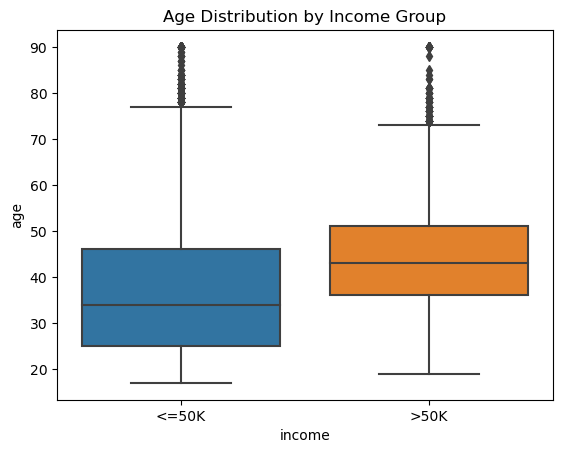

In [45]:
# Box plot of age by income group
sns.boxplot(x='income', y='age', data=cen_inc)
plt.title('Age Distribution by Income Group')
plt.show()

In [46]:
from scipy.stats import ttest_ind

# Split data into two groups based on income
highinc_grp = cen_inc[cen_inc['income'] == '>50K']['age']
lowinc_grp = cen_inc[cen_inc['income'] == '<=50K']['age']

# Perform the T-Test
t_stat, p_value = ttest_ind(highinc_grp, lowinc_grp)
print(p_value)

if p_value < 0.05:
    print("Reject the null hypothesis. Age is related to income.")
else:
    print("Fail to reject the null hypothesis. Age is not related to income.")

0.0
Reject the null hypothesis. Age is related to income.


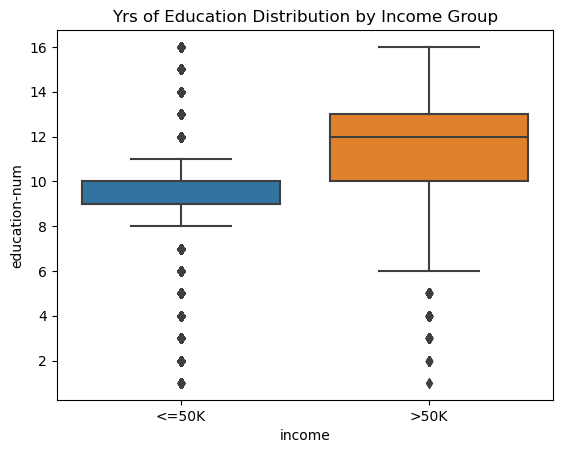

In [47]:
# Box plot of yrs of education by income group
sns.boxplot(x='income', y='education-num', data=cen_inc)
plt.title('Yrs of Education Distribution by Income Group')
plt.show()


In [48]:
# Split data into two groups based on income
highinc_grp = cen_inc[cen_inc['income'] == '>50K']['education-num']
lowinc_grp = cen_inc[cen_inc['income'] == '<=50K']['education-num']

# Perform the T-Test
t_stat, p_value = ttest_ind(highinc_grp, lowinc_grp)
print(p_value)

if p_value < 0.05:
    print("Reject the null hypothesis. No. of yrs of education is related to income.")
else:
    print("Fail to reject the null hypothesis. No. of yrs of education is not related to income.")

0.0
Reject the null hypothesis. No. of yrs of education is related to income.


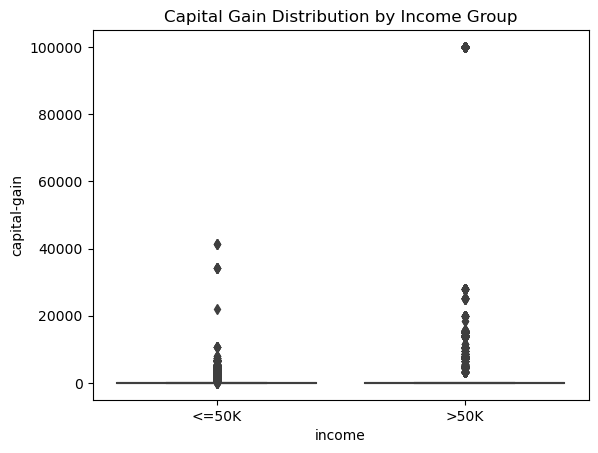

In [49]:
# Box plot of capital gain by income group
sns.boxplot(x='income', y='capital-gain', data=cen_inc)
plt.title('Capital Gain Distribution by Income Group')
plt.show()

In [50]:
# Split data into two groups based on income
highinc_grp = cen_inc[cen_inc['income'] == '>50K']['capital-gain']
lowinc_grp = cen_inc[cen_inc['income'] == '<=50K']['capital-gain']

# Perform the T-Test
t_stat, p_value = ttest_ind(highinc_grp, lowinc_grp)
print(p_value)

if p_value < 0.05:
    print("Reject the null hypothesis. Capital Gain is related to income.")
else:
    print("Fail to reject the null hypothesis. Capital Gain is not related to income.")

0.0
Reject the null hypothesis. Capital Gain is related to income.


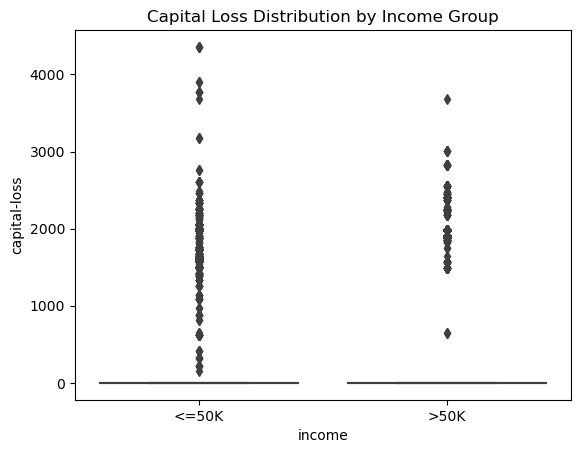

In [51]:
# Box plot of capital loss by income group
sns.boxplot(x='income', y='capital-loss', data=cen_inc)
plt.title('Capital Loss Distribution by Income Group')
plt.show()

In [52]:
# Split data into two groups based on income
highinc_grp = cen_inc[cen_inc['income'] == '>50K']['capital-loss']
lowinc_grp = cen_inc[cen_inc['income'] == '<=50K']['capital-loss']

# Perform the T-Test
t_stat, p_value = ttest_ind(highinc_grp, lowinc_grp)
print(p_value)

if p_value < 0.05:
    print("Reject the null hypothesis. Capital Loss is related to income.")
else:
    print("Fail to reject the null hypothesis. Capital Loss is not related to income.")

8.543599059617503e-236
Reject the null hypothesis. Capital Loss is related to income.


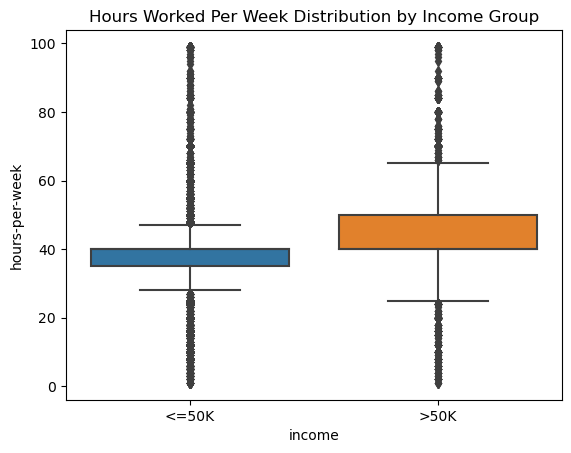

In [53]:
# Box plot of hrs worked per week by income group
sns.boxplot(x='income', y='hours-per-week', data=cen_inc)
plt.title('Hours Worked Per Week Distribution by Income Group')
plt.show()

In [54]:
# Split data into two groups based on income
highinc_grp = cen_inc[cen_inc['income'] == '>50K']['hours-per-week']
lowinc_grp = cen_inc[cen_inc['income'] == '<=50K']['hours-per-week']

# Perform the T-Test
t_stat, p_value = ttest_ind(highinc_grp, lowinc_grp)
print(p_value)

if p_value < 0.05:
    print("Reject the null hypothesis. Hrs worked per week is related to income.")
else:
    print("Fail to reject the null hypothesis. Hrs worked per week is not related to income.")

0.0
Reject the null hypothesis. Hrs worked per week is related to income.


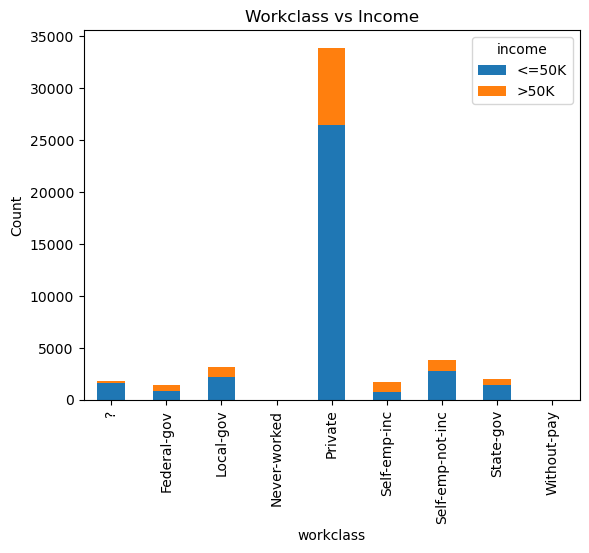

In [55]:
# Bar chart showing the count of people in each workclass category by income
pd.crosstab(cen_inc['workclass'], cen_inc['income']).plot(kind='bar', stacked=True)
plt.title('Workclass vs Income')
plt.ylabel('Count')
plt.show()

In [56]:
from scipy.stats import chi2_contingency

# Create a contingency table for workclass and income
cont_tbl = pd.crosstab(cen_inc['workclass'], cen_inc['income'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(cont_tbl)

if p < 0.05:
    print("Reject the null hypothesis. Workclass is related to income.")
else:
    print("Fail to reject the null hypothesis. Workclass is not related to income.")

Reject the null hypothesis. Workclass is related to income.


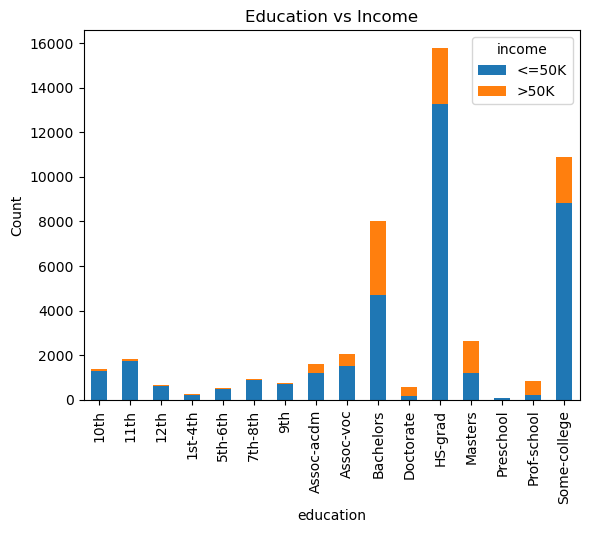

In [57]:
# Bar chart showing the count of people in each education category by income
pd.crosstab(cen_inc['education'], cen_inc['income']).plot(kind='bar', stacked=True)
plt.title('Education vs Income')
plt.ylabel('Count')
plt.show()

In [58]:
# Create a contingency table for education and income
cont_tbl = pd.crosstab(cen_inc['education'], cen_inc['income'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(cont_tbl)

print(p)
if p < 0.05:
    print("Reject the null hypothesis. Education is related to income.")
else:
    print("Fail to reject the null hypothesis. Education is not related to income.")

0.0
Reject the null hypothesis. Education is related to income.


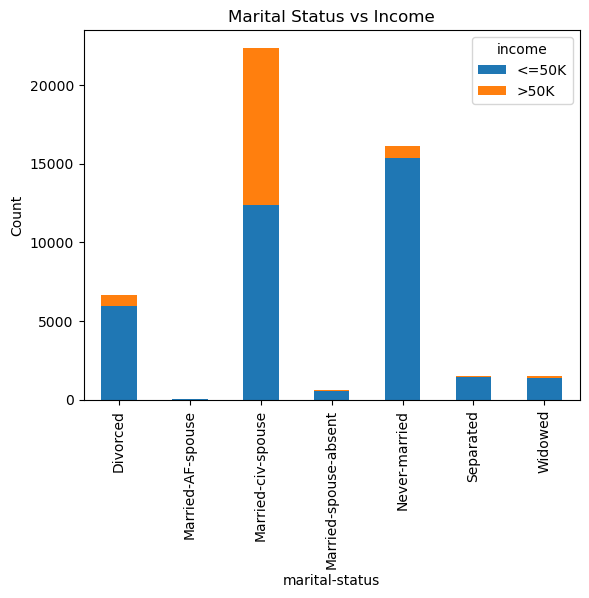

In [59]:
# Bar chart showing the count of people in each education category by income
pd.crosstab(cen_inc['marital-status'], cen_inc['income']).plot(kind='bar', stacked=True)
plt.title('Marital Status vs Income')
plt.ylabel('Count')
plt.show()

In [60]:
# Create a contingency table for marital status and income
cont_tbl = pd.crosstab(cen_inc['marital-status'], cen_inc['income'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(cont_tbl)

print(p)
if p < 0.05:
    print("Reject the null hypothesis. Marital Status is related to income.")
else:
    print("Fail to reject the null hypothesis. Marital Status is not related to income.")

0.0
Reject the null hypothesis. Marital Status is related to income.


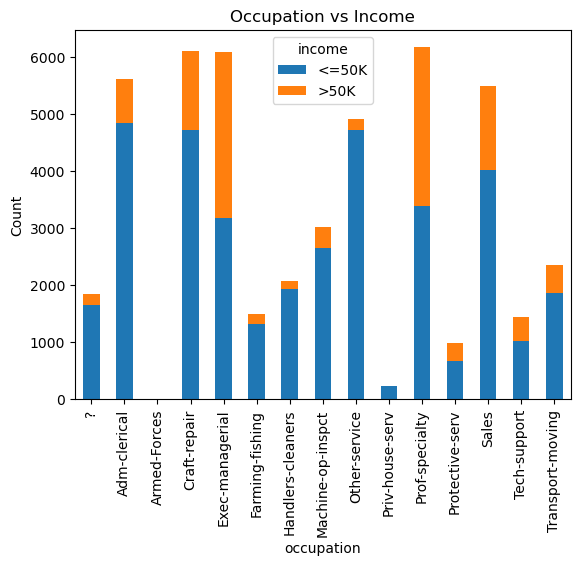

In [61]:
# Bar chart showing the count of people in each education category by income
pd.crosstab(cen_inc['occupation'], cen_inc['income']).plot(kind='bar', stacked=True)
plt.title('Occupation vs Income')
plt.ylabel('Count')
plt.show()

In [62]:
# Create a contingency table for occupation and income
cont_tbl = pd.crosstab(cen_inc['occupation'], cen_inc['income'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(cont_tbl)

print(p)
if p < 0.05:
    print("Reject the null hypothesis. Occupation is related to income.")
else:
    print("Fail to reject the null hypothesis. Occupation is not related to income.")

0.0
Reject the null hypothesis. Occupation is related to income.


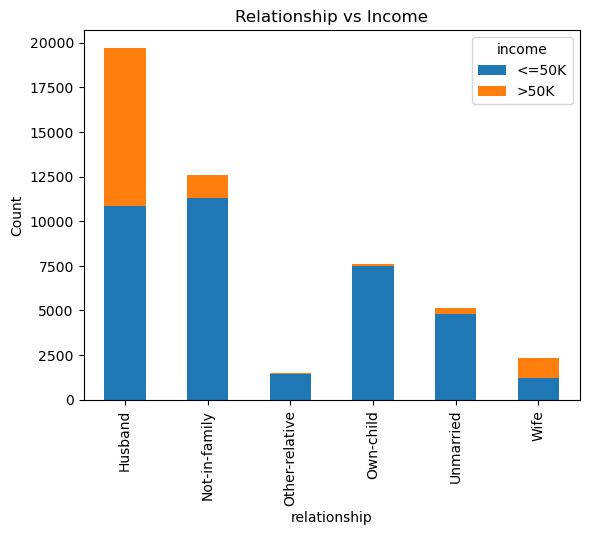

In [63]:
# Bar chart showing the count of people in each education category by income
pd.crosstab(cen_inc['relationship'], cen_inc['income']).plot(kind='bar', stacked=True)
plt.title('Relationship vs Income')
plt.ylabel('Count')
plt.show()

In [64]:
# Create a contingency table for relationship and income
cont_tbl = pd.crosstab(cen_inc['relationship'], cen_inc['income'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(cont_tbl)

print(p)
if p < 0.05:
    print("Reject the null hypothesis. Relationship is related to income.")
else:
    print("Fail to reject the null hypothesis. Relationship is not related to income.")

0.0
Reject the null hypothesis. Relationship is related to income.


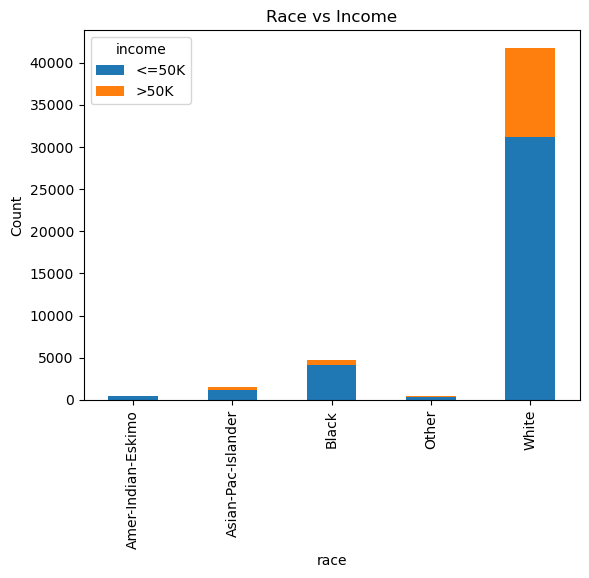

In [65]:
# Bar chart showing the count of people in each education category by income
pd.crosstab(cen_inc['race'], cen_inc['income']).plot(kind='bar', stacked=True)
plt.title('Race vs Income')
plt.ylabel('Count')
plt.show()

In [66]:
# Create a contingency table for occupation and income
cont_tbl = pd.crosstab(cen_inc['race'], cen_inc['income'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(cont_tbl)

print(p)
if p < 0.05:
    print("Reject the null hypothesis. Race is related to income.")
else:
    print("Fail to reject the null hypothesis. Race is not related to income.")

4.284377710223499e-104
Reject the null hypothesis. Race is related to income.


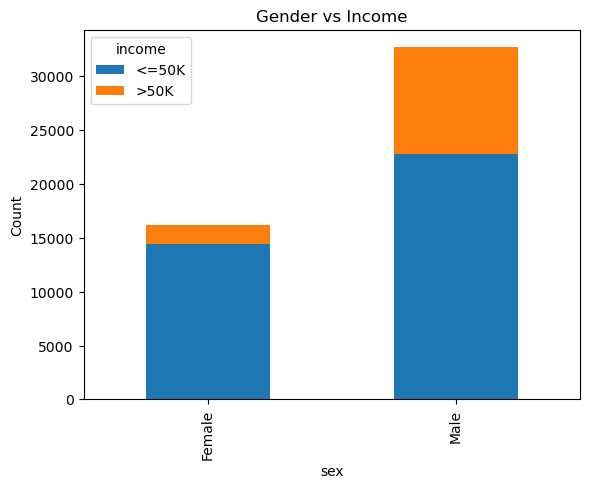

In [67]:
# Bar chart showing the count of people in each education category by income
pd.crosstab(cen_inc['sex'], cen_inc['income']).plot(kind='bar', stacked=True)
plt.title('Gender vs Income')
plt.ylabel('Count')
plt.show()


In [68]:
# Create a contingency table for sex and income
cont_tbl = pd.crosstab(cen_inc['sex'], cen_inc['income'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(cont_tbl)

print(p)
if p < 0.05:
    print("Reject the null hypothesis. Gender is related to income.")
else:
    print("Fail to reject the null hypothesis. Gender is not related to income.")

0.0
Reject the null hypothesis. Gender is related to income.


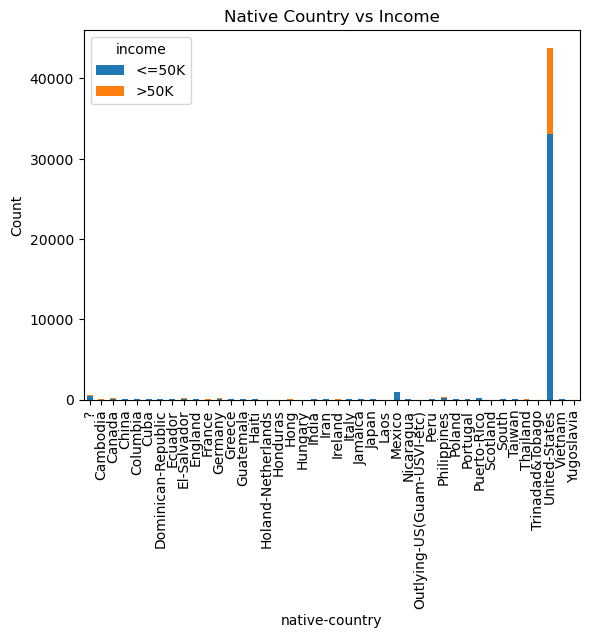

In [69]:
# Bar chart showing the count of people in each education category by income
pd.crosstab(cen_inc['native-country'], cen_inc['income']).plot(kind='bar', stacked=True)
plt.title('Native Country vs Income')
plt.ylabel('Count')
plt.show()

In [70]:
# Create a contingency table for native country and income
cont_tbl = pd.crosstab(cen_inc['native-country'], cen_inc['income'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(cont_tbl)

print(p)
if p < 0.05:
    print("Reject the null hypothesis. Native Country is related to income.")
else:
    print("Fail to reject the null hypothesis. Native Country is not related to income.")

1.5032791592475216e-70
Reject the null hypothesis. Native Country is related to income.
